In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
from xgboost import XGBClassifier
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef, roc_auc_score, precision_score, recall_score
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

# Load the data
dataset_root = 'drive/My Drive/Colab Notebooks/datasets/'
train_df = pd.read_csv(dataset_root+"boy or girl 2025 train_missingValue.csv")
test_df = pd.read_csv(dataset_root+"boy or girl 2025 test no ans_missingValue.csv")

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          423 non-null    int64  
 1   gender      423 non-null    int64  
 2   star_sign   337 non-null    object 
 3   phone_os    345 non-null    object 
 4   height      349 non-null    float64
 5   weight      338 non-null    float64
 6   sleepiness  332 non-null    float64
 7   iq          344 non-null    float64
 8   fb_friends  346 non-null    float64
 9   yt          333 non-null    object 
 10  self_intro  319 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 36.5+ KB


In [126]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          426 non-null    int64  
 1   gender      426 non-null    int64  
 2   star_sign   345 non-null    object 
 3   phone_os    330 non-null    object 
 4   height      358 non-null    float64
 5   weight      330 non-null    float64
 6   sleepiness  354 non-null    float64
 7   iq          334 non-null    float64
 8   fb_friends  338 non-null    float64
 9   yt          348 non-null    float64
 10  self_intro  333 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 36.7+ KB


In [127]:
train_df['phone_os'].unique()

array(['Apple', nan, 'Android', 'Windows Phone', 'JohnCena'], dtype=object)

In [128]:
train_df['weight'].unique()

array([ 4.30e+001,  4.70e+001,  6.10e+001,  6.20e+001,  6.70e+001,
              nan,  5.00e+001,  5.70e+001,  5.50e+001,  6.00e+001,
        5.30e+001,  5.20e+001,  7.50e+001,  1.80e+002,  4.80e+001,
        7.30e+001,  8.00e+001,  7.40e+001,  5.80e+001,  7.00e+001,
        6.50e+001,  6.40e+001,  1.25e+002,  2.00e+002,  8.50e+001,
        8.30e+001,  7.10e+001,  8.20e+001,  6.30e+001,  1.23e+002,
        6.80e+001,  6.60e+001,  6.90e+001,  4.90e+001,  7.20e+001,
        8.60e+001,  7.00e+000,  5.90e+001,  1.00e+111,  9.90e+001,
        1.00e+002,  5.40e+001,  4.40e+001,  7.60e+001,  4.60e+001,
        9.00e+001,  5.60e+001,  8.70e+001,  5.00e+002,  7.80e+001,
        1.20e+001,  5.10e+001,  4.50e+001, -1.00e+003,  4.00e+001,
        1.87e+002,  1.00e+001,  1.10e+002,  7.90e+001])

In [129]:
train_df.describe()

,id,gender,height,weight,sleepiness,iq,fb_friends
count,423.000000,423.000000,3.490000e+02,3.380000e+02,332.000000,344.000000,3.460000e+02
mean,212.000000,1.252955,2.865330e+108,2.958580e+108,3.418675,124.723837,1.251510e+07
std,122.253834,0.435220,5.352877e+109,5.439283e+109,1.222652,37.683304,1.755826e+08
min,1.000000,1.000000,-1.870000e+02,-1.000000e+03,1.000000,50.000000,-1.000000e+03
25%,106.500000,1.000000,1.650000e+02,5.500000e+01,3.000000,100.000000,2.000000e+02
50%,212.000000,1.000000,1.710000e+02,6.450000e+01,3.000000,120.000000,4.000000e+02
75%,317.500000,2.000000,1.760000e+02,7.275000e+01,4.000000,145.000000,7.000000e+02
max,423.000000,2.000000,1.000000e+111,1.000000e+111,5.000000,200.000000,3.000000e+09


In [130]:
train_df.describe()

,id,gender,height,weight,sleepiness,iq,fb_friends
count,423.000000,423.000000,3.490000e+02,3.380000e+02,332.000000,344.000000,3.460000e+02
mean,212.000000,1.252955,2.865330e+108,2.958580e+108,3.418675,124.723837,1.251510e+07
std,122.253834,0.435220,5.352877e+109,5.439283e+109,1.222652,37.683304,1.755826e+08
min,1.000000,1.000000,-1.870000e+02,-1.000000e+03,1.000000,50.000000,-1.000000e+03
25%,106.500000,1.000000,1.650000e+02,5.500000e+01,3.000000,100.000000,2.000000e+02
50%,212.000000,1.000000,1.710000e+02,6.450000e+01,3.000000,120.000000,4.000000e+02
75%,317.500000,2.000000,1.760000e+02,7.275000e+01,4.000000,145.000000,7.000000e+02
max,423.000000,2.000000,1.000000e+111,1.000000e+111,5.000000,200.000000,3.000000e+09


In [131]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib

# 填補缺失值
train_df['self_intro'] = train_df['self_intro'].fillna('')

models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),  # 加入 Decision Tree
    "K-Neighbors": KNeighborsClassifier(n_neighbors=5)  # 加入 KNN，通常 n_neighbors=5
}

# 文本清理函數
def clean_text(text):
  if not isinstance(text, str):  # 檢查文本是否為字符串類型
    text = str(text)
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

train_df['self_intro'] = train_df['self_intro'].apply(clean_text)
test_df['self_intro'] = test_df['self_intro'].apply(clean_text)

# TF-IDF 向量化
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(train_df['self_intro']).toarray()

# 準備訓練數據
y = train_df['gender'].apply(lambda x:x-1)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF稀疏矩陣使用RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# 訓練 SVM 模型
for name, model in models.items():
    model.fit(X_train, y_train)

    # 儲存模型到檔案
    joblib.dump(model, f"{name}_TF-IDF_model.pkl")

    y_pred = model.predict(X_test)
    print("====================================================================")
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Precision:", precision_score(y_test, y_pred))
    print(f"{name} Recall:", recall_score(y_test, y_pred))
    print(f"{name} F1-score:", f1_score(y_test, y_pred))
    print(f"{name} MCC:", matthews_corrcoef(y_test, y_pred))
    print("Prediction Counts:", np.bincount(y_pred))

Logistic Regression Accuracy: 0.7411764705882353
Logistic Regression Precision: 0.5
Logistic Regression Recall: 0.13636363636363635
Logistic Regression F1-score: 0.21428571428571427
Logistic Regression MCC: 0.15175196573556626
Prediction Counts: [79  6]
SVM Accuracy: 0.7647058823529411
SVM Precision: 0.5714285714285714
SVM Recall: 0.36363636363636365
SVM F1-score: 0.4444444444444444
SVM MCC: 0.316933489655713
Prediction Counts: [71 14]
Naive Bayes Accuracy: 0.4588235294117647
Naive Bayes Precision: 0.3
Naive Bayes Recall: 0.8181818181818182
Naive Bayes F1-score: 0.43902439024390244
Naive Bayes MCC: 0.14564381625088382
Prediction Counts: [25 60]
AdaBoost Accuracy: 0.7411764705882353
AdaBoost Precision: 0.5
AdaBoost Recall: 0.13636363636363635
AdaBoost F1-score: 0.21428571428571427
AdaBoost MCC: 0.15175196573556626
Prediction Counts: [79  6]
Random Forest Accuracy: 0.7411764705882353
Random Forest Precision: 0.5
Random Forest Recall: 0.36363636363636365
Random Forest F1-score: 0.42105263

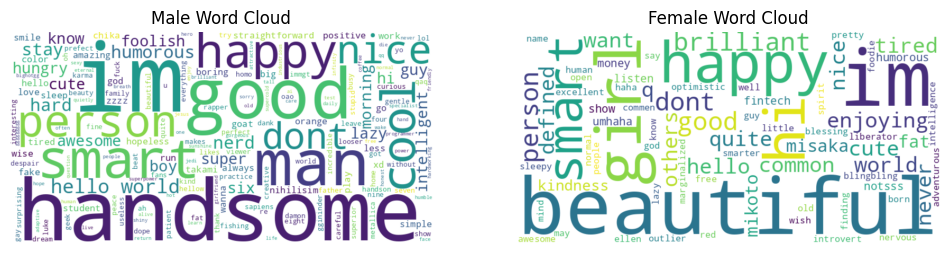

In [132]:
# 文字雲可視化
male_text = " ".join(train_df[train_df['gender'] == 1]['self_intro'])
female_text = " ".join(train_df[train_df['gender'] == 2]['self_intro'])

wordcloud_male = WordCloud(width=800, height=400, background_color='white').generate(male_text)
wordcloud_female = WordCloud(width=800, height=400, background_color='white').generate(female_text)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_male, interpolation='bilinear')
plt.axis("off")
plt.title("Male Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_female, interpolation='bilinear')
plt.axis("off")
plt.title("Female Word Cloud")
plt.show()

In [133]:
# 1. 載入 BERT 模型和 tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

# 2. 將文本轉換為 BERT 向量
def get_bert_embeddings(texts):
    tokens = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")
    outputs = bert_model(tokens.input_ids)
    return outputs.pooler_output.numpy()  # (batch_size, 768)

# 3. 產生特徵
X_bert = get_bert_embeddings(train_df["self_intro"].to_list())  # shape = (num_samples, 768)

X_train, X_test, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

# 針對 BERT 特徵使用 SMOTE (適用於密集向量)
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train, y_train)

    # 儲存模型到檔案
    joblib.dump(model, f"{name}_Bert_model.pkl")

    y_pred = model.predict(X_test)
    print("====================================================================")
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Precision:", precision_score(y_test, y_pred))
    print(f"{name} Recall:", recall_score(y_test, y_pred))
    print(f"{name} F1-score:", f1_score(y_test, y_pred))
    print(f"{name} MCC:", matthews_corrcoef(y_test, y_pred))
    print("Prediction Counts:", np.bincount(y_pred))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Logistic Regression Accuracy: 0.7529411764705882
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.045454545454545456
Logistic Regression F1-score: 0.08695652173913043
Logistic Regression MCC: 0.1846372364689991
Prediction Counts: [84  1]
SVM Accuracy: 0.7411764705882353
SVM Precision: 0.0
SVM Recall: 0.0
SVM F1-score: 0.0
SVM MCC: 0.0
Prediction Counts: [85]
Naive Bayes Accuracy: 0.6588235294117647
Naive Bayes Precision: 0.23076923076923078
Naive Bayes Recall: 0.13636363636363635
Naive Bayes F1-score: 0.17142857142857143
Naive Bayes MCC: -0.027217119136765878
Prediction Counts: [72 13]
AdaBoost Accuracy: 0.7647058823529411
AdaBoost Precision: 0.5833333333333334
AdaBoost Recall: 0.3181818181818182
AdaBoost F1-score: 0.4117647058823529
AdaBoost MCC: 0.3003961246024786
Prediction Counts: [73 12]
Random Forest Accuracy: 0.7647058823529411
Random Forest Precision: 0.5833333333333334
Random Forest Recall: 0.3181818181818182
Random Forest F1-score: 0.4117647058823529
Random Fo

In [134]:
# 載入儲存的模型
# loaded_model_SVM = joblib.load('SVM_TF-IDF_model.pkl')

# train_df['sex_self_intro'] = loaded_model_SVM.predict(X_tfidf)
# train_df['sex_self_intro'] = train_df['sex_self_intro'].apply(lambda x:x+1)
# print(train_df['sex_self_intro'])
# print("Counts:", np.bincount(train_df['sex_self_intro'])[1:])


# new_data_tfidf = tfidf.transform(test_df['self_intro']).toarray()
# test_df['sex_self_intro'] = loaded_model_SVM.predict(new_data_tfidf)
# test_df['sex_self_intro'] = test_df['sex_self_intro'].apply(lambda x:x+1)

In [135]:
# 載入儲存的模型
loaded_model_RF = joblib.load('Random Forest_Bert_model.pkl')

train_df['sex_self_intro'] = loaded_model_RF.predict(X_bert)
train_df['sex_self_intro'] = train_df['sex_self_intro'].apply(lambda x:x+1)
print(train_df['sex_self_intro'])
print("Counts:", np.bincount(train_df['sex_self_intro'])[1:])


new_data_bert = get_bert_embeddings(test_df["self_intro"].to_list())
test_df['sex_self_intro'] = loaded_model_RF.predict(new_data_bert)
test_df['sex_self_intro'] = test_df['sex_self_intro'].apply(lambda x:x+1)

0      2
1      2
2      1
3      1
4      1
      ..
418    1
419    1
420    1
421    1
422    1
Name: sex_self_intro, Length: 423, dtype: int64
Counts: [354  69]


In [136]:
# Function to clean outliers
def clean_outliers(df):
    # Define reasonable ranges for numerical columns
    # height_range = (100, 250)  # cm
    # weight_range = (20, 200)   # kg
    # iq_range = (50, 250)
    # fb_friends_range = (0, 10000)
    # yt_range = (0, 10000)
    columns_to_clean = ['height', 'weight', 'iq', 'fb_friends', 'yt']

    df['yt'] = pd.to_numeric(df['yt'], errors='coerce')
    for col in ['height', 'weight', 'fb_friends', 'yt']:
      df[col] = df[col].apply(lambda x: abs(x) if pd.notna(x) else x)

    # for col, (min_val, max_val) in [('height', height_range), ('weight', weight_range), ('iq', iq_range)]:
    #     df[col] = df[col].apply(lambda x: x if pd.isna(x) or (isinstance(x, (int, float)) and min_val <= x <= max_val) else np.nan)

    for col in columns_to_clean:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # 把超過範圍的值變為 NaN
      df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

    return df

# Prepare features and target
features = ['star_sign', 'phone_os', 'height', 'weight', 'sleepiness',
           'iq', 'fb_friends', 'yt', 'self_intro', 'sex_self_intro']

# Clean outliers in both datasets
train_df = clean_outliers(train_df)
test_df = clean_outliers(test_df)

X_train = train_df[features]
y_train = train_df['gender']
X_test = test_df[features]
test_ids = test_df['id']

In [137]:
# Define preprocessing for numerical and categorical columns
numeric_features = ['height', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']
categorical_features = ['star_sign', 'phone_os', 'sex_self_intro']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', LabelEncoder())
])

# Handle self_intro separately (convert to text length)
def extract_text_length(df):
    df['self_intro_length'] = df['self_intro'].fillna('').apply(len)
    return df.drop('self_intro', axis=1)

X_train = extract_text_length(X_train)
X_test = extract_text_length(X_test)

# Update features list
numeric_features.append('self_intro_length')
features = ['star_sign', 'phone_os', 'height', 'weight', 'sleepiness',
           'iq', 'fb_friends', 'yt', 'sex_self_intro', 'self_intro_length']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)  # We'll handle categorical encoding separately
    ])

# Encode categorical variables
le_star = LabelEncoder()
le_phone = LabelEncoder()
le_sex_self_intro = LabelEncoder()

# Combine train and test data to fit the encoder with all possible labels
combined_phone_os = pd.concat([X_train['phone_os'], X_test['phone_os']], axis=0).fillna('missing')

# Fit the encoders
X_train['star_sign'] = le_star.fit_transform(X_train['star_sign'].fillna('missing'))
le_phone.fit(combined_phone_os)
X_train['phone_os'] = le_phone.transform(X_train['phone_os'].fillna('missing'))
X_train['sex_self_intro'] = le_sex_self_intro.fit_transform(X_train['sex_self_intro'].fillna('missing'))

In [138]:
# Transform test data
X_test['star_sign'] = le_star.transform(X_test['star_sign'].fillna('missing'))
X_test['phone_os'] = le_phone.transform(X_test['phone_os'].fillna('missing'))
X_test['sex_self_intro'] = le_sex_self_intro.transform(X_test['sex_self_intro'].fillna('missing'))

# Create and train the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42))])

# Split training data for validation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train[features], y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)

In [139]:
# Fit the model
pipeline.fit(X_train_split, y_train_split)

# Validate the model
val_predictions = pipeline.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, val_predictions):.4f}")
print(f"Validation Precision: {precision_score(y_val, val_predictions):.4f}")
print(f"Validation Recall: {recall_score(y_val, val_predictions):.4f}")
print(f"Validation F1-Score: {f1_score(y_val, val_predictions):.4f}")
print(f"Validation MCC: {matthews_corrcoef(y_val, val_predictions):.4f}")

# Make predictions on test set
test_predictions = pipeline.predict(X_test[features])

# Create output DataFrame
output_df = pd.DataFrame({
    'id': test_ids,
    'gender': test_predictions
})

# Save predictions
output_df.to_csv('gender_predictions.csv', index=False)
print("Predictions saved to 'gender_predictions.csv'")

Validation Accuracy: 0.8353
Validation Precision: 0.8889
Validation Recall: 0.8889
Validation F1-Score: 0.8889
Validation MCC: 0.5707
Predictions saved to 'gender_predictions.csv'


In [140]:
pred1 = pd.read_csv('gender_predictions-1.csv')
pred2 = pd.read_csv('gender_predictions.csv')

# 檢查兩個預測是否不同
diff = pred1['gender'] != pred2['gender']

# 將兩個資料框架平行顯示
comparison = pd.concat([pred1[diff], pred2[diff]], axis=1, keys=['pred1', 'pred2'])

# 顯示平行比較結果
print(comparison)

    pred1        pred2       
       id gender    id gender
44     45      2    45      1
47     48      2    48      1
65     66      2    66      1
88     89      2    89      1
104   105      2   105      1
122   123      2   123      1
129   130      2   130      1
159   160      2   160      1
164   165      2   165      1
176   177      2   177      1
185   186      2   186      1
205   206      2   206      1
207   208      2   208      1
216   217      1   217      2
234   235      2   235      1
250   251      2   251      1
252   253      2   253      1
263   264      2   264      1
267   268      2   268      1
268   269      1   269      2
271   272      2   272      1
275   276      1   276      2
291   292      2   292      1
304   305      1   305      2
307   308      2   308      1
309   310      1   310      2
322   323      2   323      1
326   327      1   327      2
349   350      2   350      1
358   359      2   359      1
369   370      2   370      1
391   392 